In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

pd.set_option('display.max_columns', 500)

hpi_df_RAW = pd.read_csv('House_Price_Index.csv')
hpi_df_RAW.head()

,Transaction Date,c11,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,bc_victoria,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,bc_vancouver,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,ab_calgary,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,ab_edmonton,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,mb_winnipeg,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,on_hamilton,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,on_toronto,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,on_ottawa,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,qc_montreal,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,qc_quebec_city,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,ns_halifax,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,NaN,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count,Index,SA Index,Smoothed Index,Smoothed SA Index,Sales Pair Count
1,Jun-1990,NaN,NaN,NaN,NaN,NaN,45.27,45.17,NaN,NaN,210,56.92,57.14,NaN,NaN,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.59,62.92,NaN,NaN,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.04,58.63,NaN,NaN,3946,61.04,61.14,NaN,NaN,826,57.26,57.34,NaN,NaN,147
2,Jul-1990,NaN,NaN,NaN,NaN,NaN,46.46,46.23,45.97,46.19,198,54.67,54.87,55.36,55.29,1189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.71,62.76,62.65,62.75,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,58.31,59.13,59.33,1654,60.71,61.46,61.71,61.67,261,57.31,56.94,57.04,56.96,221
3,Aug-1990,NaN,NaN,NaN,NaN,NaN,46.21,45.96,46.19,46.55,267,54.55,54.66,54.67,54.52,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.67,62.41,62.56,62.52,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.00,58.53,58.82,59.52,1098,60.40,60.85,61.79,62.30,180,56.57,56.56,56.98,56.79,223
4,Sep-1990,NaN,NaN,NaN,NaN,NaN,45.89,46.19,46.30,46.67,210,54.79,54.81,54.48,54.66,1405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.31,62.37,62.19,62.23,638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.23,59.36,58.50,59.44,789,61.46,62.78,61.81,62.53,122,57.07,56.85,56.86,56.76,139


In [268]:
hpi_df_RAW.columns

Index(['Transaction Date', 'c11', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'bc_victoria', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'bc_vancouver', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'ab_calgary', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'ab_edmonton',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'mb_winnipeg', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'on_hamilton', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'on_toronto', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'on_ottawa', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'qc_montreal',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'qc_quebec_city', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'ns_halifax', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnam

In [269]:
hpi_df = hpi_df_RAW.copy().iloc[:, [0, 9, 10]]
hpi_df.columns = hpi_df.iloc[0]
hpi_df = hpi_df.iloc[2:, :].\
    rename(columns={hpi_df.columns[0]: 'month_year'})
hpi_df['month_year'] = pd.to_datetime(hpi_df['month_year'])
hpi_df.iloc[:, 1:] = hpi_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
hpi_df.set_index(hpi_df.columns[0], inplace=True)
hpi_df.rename(columns={'Smoothed SA Index':'hpi', 'Sales Pair Count': 'spc'}, inplace=True)
    
hpi_df.head()

C:\Users\xavie\AppData\Local\Temp\ipykernel_13540\4102279437.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  hpi_df.iloc[:, 1:] = hpi_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


,hpi,spc
month_year,,
1990-07-01,46.19,198
1990-08-01,46.55,267
1990-09-01,46.67,210
1990-10-01,46.40,219
1990-11-01,46.30,277


In [270]:
hpi_df.columns

Index(['hpi', 'spc'], dtype='object', name=0)

In [271]:
min_months, _ = find_peaks(-hpi_df['hpi'].values, width = 3, prominence=0)

best_months = hpi_df.iloc[min_months, :]
best_months

,hpi,spc
month_year,,
1990-12-01,46.05,223
1996-06-01,59.99,404
1997-12-01,60.90,304
1998-10-01,60.28,345
2001-03-01,62.58,292
2006-10-01,123.64,349
2009-04-01,132.20,275
2010-12-01,140.50,210
2012-11-01,139.24,240


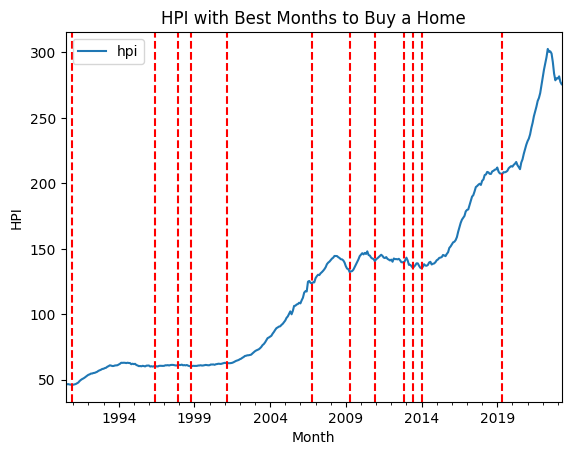

In [272]:
hpi_df.plot(y='hpi')

# Add vertical lines at the best months
for month in best_months.index:
    plt.axvline(x=month, color='red', linestyle='--')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('HPI')
plt.title('HPI with Best Months to Buy a Home')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Machine Learning

In [273]:
# add Buy column
hpi_df['buy'] = np.select([hpi_df.index.isin(best_months.index)], [1], default=0)

hpi_df.head()

,hpi,spc,buy
month_year,,,
1990-07-01,46.19,198,0
1990-08-01,46.55,267,0
1990-09-01,46.67,210,0
1990-10-01,46.40,219,0
1990-11-01,46.30,277,0


In [274]:
# Create some lagged features
for i in range(1, 13):
    hpi_df[f'hpi_lag_{i}'] = hpi_df['hpi'].shift(i)
    hpi_df[f'spc_lag{i}'] = hpi_df['spc'].shift(i)

# Remove rows with missing values
hpi_df = hpi_df.dropna()

hpi_df.head()

,hpi,spc,buy,hpi_lag_1,spc_lag1,hpi_lag_2,spc_lag2,hpi_lag_3,spc_lag3,hpi_lag_4,spc_lag4,hpi_lag_5,spc_lag5,hpi_lag_6,spc_lag6,hpi_lag_7,spc_lag7,hpi_lag_8,spc_lag8,hpi_lag_9,spc_lag9,hpi_lag_10,spc_lag10,hpi_lag_11,spc_lag11,hpi_lag_12,spc_lag12
month_year,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-07-01,49.81,423,0,48.96,437.0,47.85,486.0,47.29,333.0,46.73,287.0,46.45,158.0,46.20,98.0,46.05,223.0,46.30,277.0,46.40,219.0,46.67,210.0,46.55,267.0,46.19,198.0
1991-08-01,50.48,407,0,49.81,423.0,48.96,437.0,47.85,486.0,47.29,333.0,46.73,287.0,46.45,158.0,46.20,98.0,46.05,223.0,46.30,277.0,46.40,219.0,46.67,210.0,46.55,267.0
1991-09-01,50.98,330,0,50.48,407.0,49.81,423.0,48.96,437.0,47.85,486.0,47.29,333.0,46.73,287.0,46.45,158.0,46.20,98.0,46.05,223.0,46.30,277.0,46.40,219.0,46.67,210.0
1991-10-01,51.60,300,0,50.98,330.0,50.48,407.0,49.81,423.0,48.96,437.0,47.85,486.0,47.29,333.0,46.73,287.0,46.45,158.0,46.20,98.0,46.05,223.0,46.30,277.0,46.40,219.0
1991-11-01,52.36,384,0,51.60,300.0,50.98,330.0,50.48,407.0,49.81,423.0,48.96,437.0,47.85,486.0,47.29,333.0,46.73,287.0,46.45,158.0,46.20,98.0,46.05,223.0,46.30,277.0


In [275]:
# Define features and target
X = hpi_df.drop(columns=['buy'])
y = hpi_df['buy']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline to the training data
X_res, y_res = pipeline.fit_resample(X_train, y_train)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Now you can predict with your model
next_month_features = hpi_df.iloc[-1]  # grab the features for the last month in your data
next_month_features = next_month_features.drop('buy')  # drop the target value

# Now make a prediction for the next month
buy_next_month = model.predict([next_month_features])[0]
print(f'Predicted Buy for next month: {buy_next_month}')

Accuracy: 0.961038961038961
Predicted Buy for next month: 0


c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [282]:
hpi_model = hpi_df.copy()
hpi_model.loc[hpi_model.index[-len(y_pred):],'model'] = y_pred

hpi_model = hpi_model.query("model == 1")
hpi_model.head()


,hpi,spc,buy,hpi_lag_1,spc_lag1,hpi_lag_2,spc_lag2,hpi_lag_3,spc_lag3,hpi_lag_4,spc_lag4,hpi_lag_5,spc_lag5,hpi_lag_6,spc_lag6,hpi_lag_7,spc_lag7,hpi_lag_8,spc_lag8,hpi_lag_9,spc_lag9,hpi_lag_10,spc_lag10,hpi_lag_11,spc_lag11,hpi_lag_12,spc_lag12,model
month_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,207.45,314,0,207.63,218.0,208.93,199.0,212.09,265.0,210.64,377.0,210.43,317.0,209.59,345.0,209.15,517.0,207.23,483.0,207.23,604.0,208.38,445.0,208.74,459.0,206.76,342.0,1.0
2023-02-01,281.73,219,0,280.03,338.0,280.31,150.0,278.71,345.0,283.84,363.0,292.67,359.0,299.16,764.0,300.82,1052.0,300.53,364.0,302.68,373.0,296.37,299.0,291.42,329.0,286.85,330.0,1.0


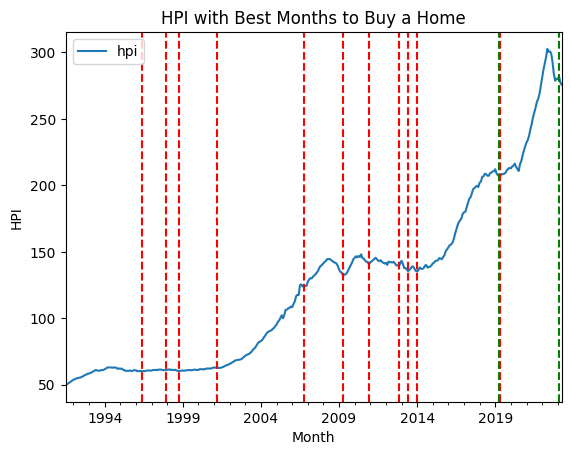

In [283]:
hpi_df.plot(y='hpi')

# Add vertical lines at the best months
for month in best_months.index:
    plt.axvline(x=month, color='red', linestyle='--')

for month in hpi_model.index:
    plt.axvline(x=month, color='green', linestyle='--')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('HPI')
plt.title('HPI with Best Months to Buy a Home')

# Add a legend
plt.legend()

# Show the plot
plt.show()